# 0 Import packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1 Organize

### 1.1 Import data
###### 1.1.1 Upstream

In [2]:
## parse_dates tells python which column contains date/time data
## index_col assigns row index to specified column values
up_DO = pd.read_csv('Data/Clean/upstream/upstream-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
up_level = pd.read_csv('Data/Clean/upstream/upstream-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
up_wtemp = pd.read_csv('Data/Clean/upstream/upstream-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [3]:
## rename columns
up_DO.columns = ['DO']
up_level.columns = ['Level']
up_wtemp.columns = ['WaterTemp']

###### 1.1.2 Transitional

In [4]:
## upload transitional data
tr_DO = pd.read_csv('Data/Clean/transitional/transitional-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
tr_level = pd.read_csv('Data/Clean/transitional/transitional-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
tr_wtemp = pd.read_csv('Data/Clean/transitional/transitional-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [5]:
## rename columns
tr_DO.columns = ['DO']
tr_level.columns = ['Level']
tr_wtemp.columns = ['WaterTemp']

###### 1.1.3 Estuarine

In [6]:
## upload estuarine data
es_DO = pd.read_csv('Data/Clean/estuarine/estuarine-DO_mgL.csv',
                    parse_dates=['LocalTimestamp'],
                    index_col = 'LocalTimestamp')
es_level = pd.read_csv('Data/Clean/estuarine/estuarine-level_ft.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')
es_wtemp = pd.read_csv('Data/Clean/estuarine/estuarine-wtemp_C.csv',
                       parse_dates=['LocalTimestamp'],
                       index_col = 'LocalTimestamp')

In [7]:
## rename columns
es_DO.columns = ['DO']
es_level.columns = ['Level']
es_wtemp.columns = ['WaterTemp']

### 1.2 Generate datasets for the river reaches

In [8]:
## let's look at the first three rows of the upstream DO data
up_DO[:3]

,DO
LocalTimestamp,
2015-01-01 00:00:00,8.9
2015-01-01 01:00:00,8.9
2015-01-01 02:00:00,8.9


In [9]:
## now let's look at the upstream water level data
up_level[:3]

,Level
LocalTimestamp,
2015-01-01 00:00:00,1.9
2015-01-01 00:15:00,1.9
2015-01-01 00:30:00,1.9


#### Note that these data have different temporal resolution - the DO data are hourly, but the water level data were captured every 15 minutes. We want to create a single data frame that contains our total dataset, but we need to make sure the data collection timestamps match.

###### 1.2.1 Upstream dataset

In [10]:
## to do this, we can merge the data using the LocalTimestamp columns in each of our imported 
## data series:
upstream = up_level.join(up_DO)
upstream = upstream.join(up_wtemp)

In [11]:
## let's look at the first few rows of our new merged data frame named "upstream"
upstream[:10]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,1.90,8.9,17.6
2015-01-01 00:15:00,1.90,NaN,NaN
2015-01-01 00:30:00,1.90,NaN,NaN
2015-01-01 00:45:00,1.91,NaN,NaN
2015-01-01 01:00:00,1.91,8.9,17.6
2015-01-01 01:15:00,1.92,NaN,NaN
2015-01-01 01:30:00,1.92,NaN,NaN
2015-01-01 01:45:00,1.93,NaN,NaN
2015-01-01 02:00:00,1.93,8.9,17.6


###### 1.2.2 Transitional dataset

In [12]:
transitional = tr_level.join(tr_DO)
transitional = transitional.join(tr_wtemp)
transitional[:5]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,1.09,7.8,18.4
2015-01-01 00:15:00,1.10,7.8,18.4
2015-01-01 00:30:00,1.09,7.8,18.4
2015-01-01 00:45:00,1.09,7.7,18.4
2015-01-01 01:00:00,1.09,7.7,18.4


#### Note that all transitional data have a timestep of 15 minutes

###### 1.2.3 Estuarine dataset

In [13]:
estuarine = es_level.join(es_DO)
estuarine = estuarine.join(es_wtemp)
estuarine[:5]

,Level,DO,WaterTemp
LocalTimestamp,,,
2015-01-01 00:00:00,-0.50,8.8,14.5
2015-01-01 00:15:00,-0.53,NaN,NaN
2015-01-01 00:30:00,-0.54,NaN,NaN
2015-01-01 00:45:00,-0.57,NaN,NaN
2015-01-01 01:00:00,-0.58,8.6,14.3


###### 1.2.4 LSJR dataset (ALL data: upstream, transitional, estuarine)

In [14]:
lsjr = upstream.join(transitional,rsuffix='_tr')
lsjr = lsjr.join(estuarine,rsuffix='_es')
lsjr.columns.values[0:3] = ['Level_up','DO_up','WaterTemp_up']
lsjr[:5]

,Level_up,DO_up,WaterTemp_up,Level_tr,DO_tr,WaterTemp_tr,Level_es,DO_es,WaterTemp_es
LocalTimestamp,,,,,,,,,
2015-01-01 00:00:00,1.90,8.9,17.6,1.09,7.8,18.4,-0.50,8.8,14.5
2015-01-01 00:15:00,1.90,NaN,NaN,1.10,7.8,18.4,-0.53,NaN,NaN
2015-01-01 00:30:00,1.90,NaN,NaN,1.09,7.8,18.4,-0.54,NaN,NaN
2015-01-01 00:45:00,1.91,NaN,NaN,1.09,7.7,18.4,-0.57,NaN,NaN
2015-01-01 01:00:00,1.91,8.9,17.6,1.09,7.7,18.4,-0.58,8.6,14.3


#### For the sake of simplicity, remove all rows with NA values from the LSJR dataset

In [15]:
# lsjr.dropna(axis = 0, how = 'any')

# 2 Analyze

### 2.1 Plot data

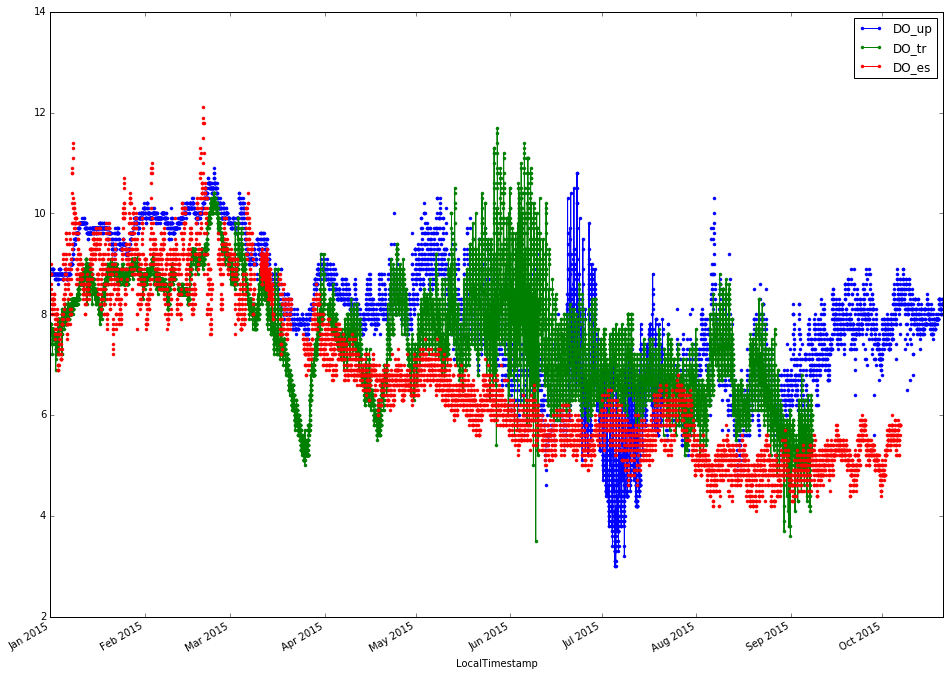

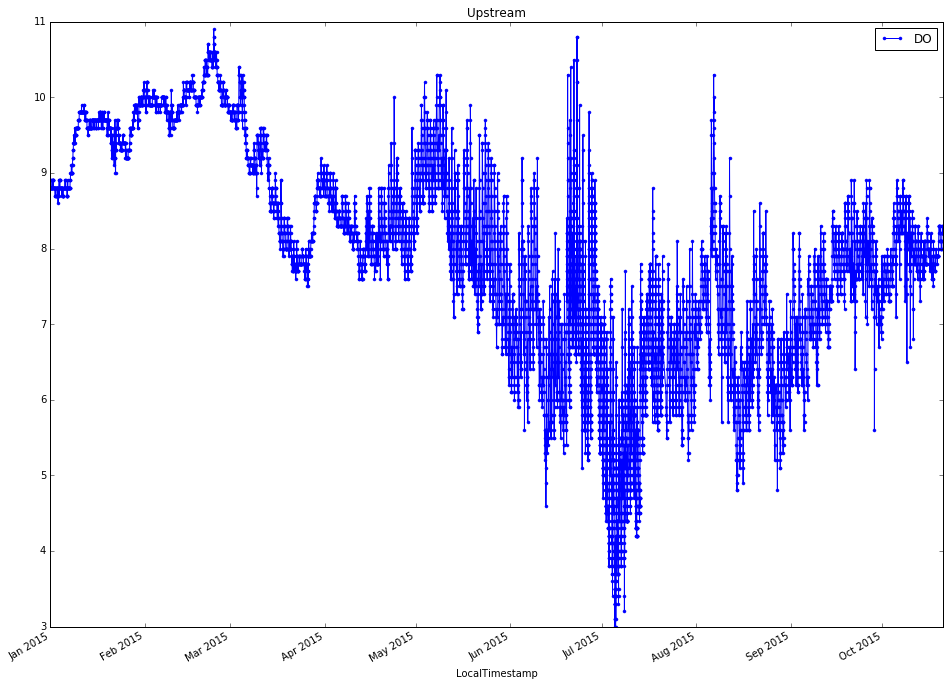

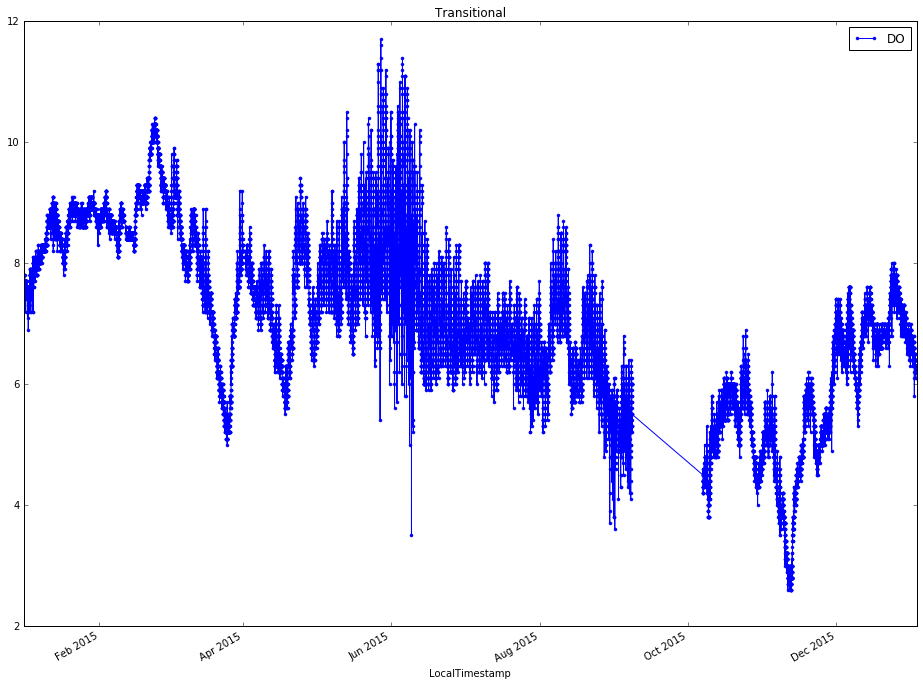

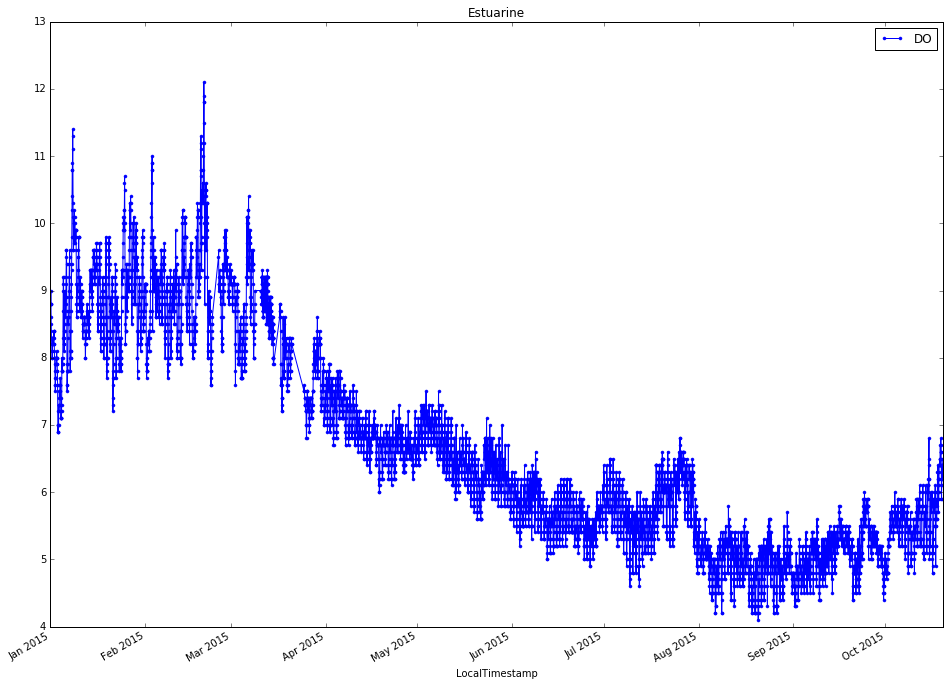

In [30]:
## use pd.concat to create a new dataframe composed of specific lsjr columns
df = pd.concat([lsjr['DO_up'],lsjr['DO_tr'],lsjr['DO_es']],axis=1)
## create a multi-line plot
df.plot(marker='.')
## plot each of the three DO time series independently
up_DO.plot(marker='.', title = 'Upstream')
tr_DO.plot(marker='.', title = 'Transitional')
es_DO.plot(marker='.', title = 'Estuarine')

In [27]:
# increase plot size for subsequent figures
plt.rcParams['figure.figsize'] = (16,12)

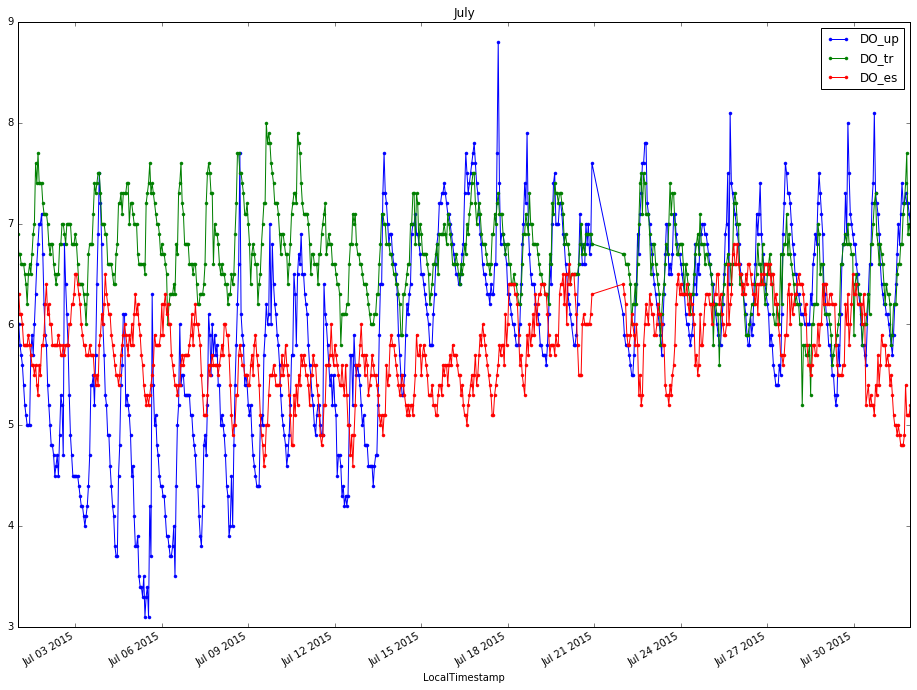

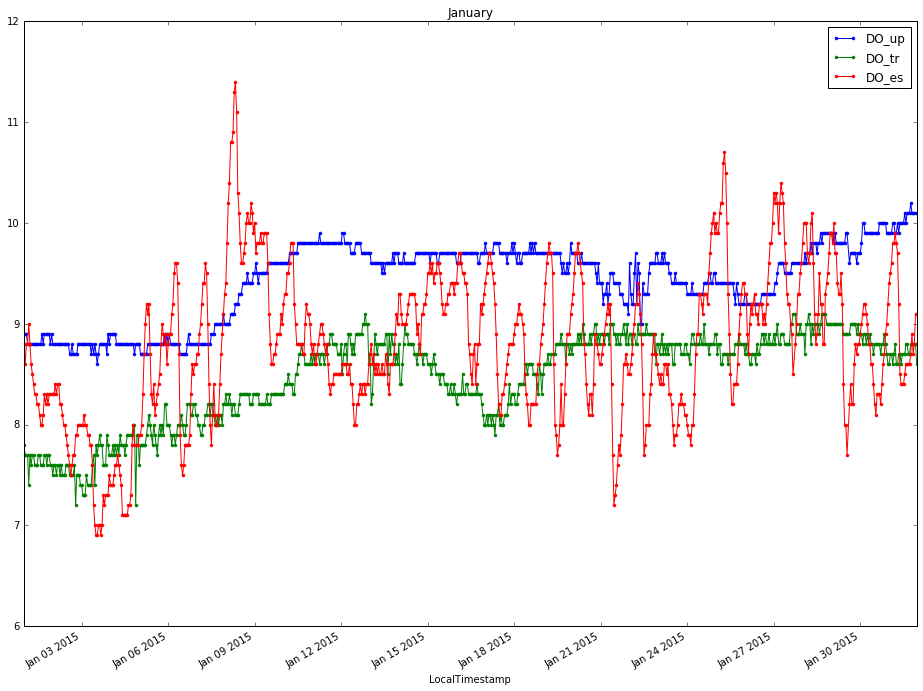

In [28]:
# only July and January
dfjul = df[(df.index.month == 7)]
dfjul.dropna().plot(marker='.',title='July')
dfjan = df[(df.index.month == 1)]
dfjan.dropna().plot(marker='.',title='January')

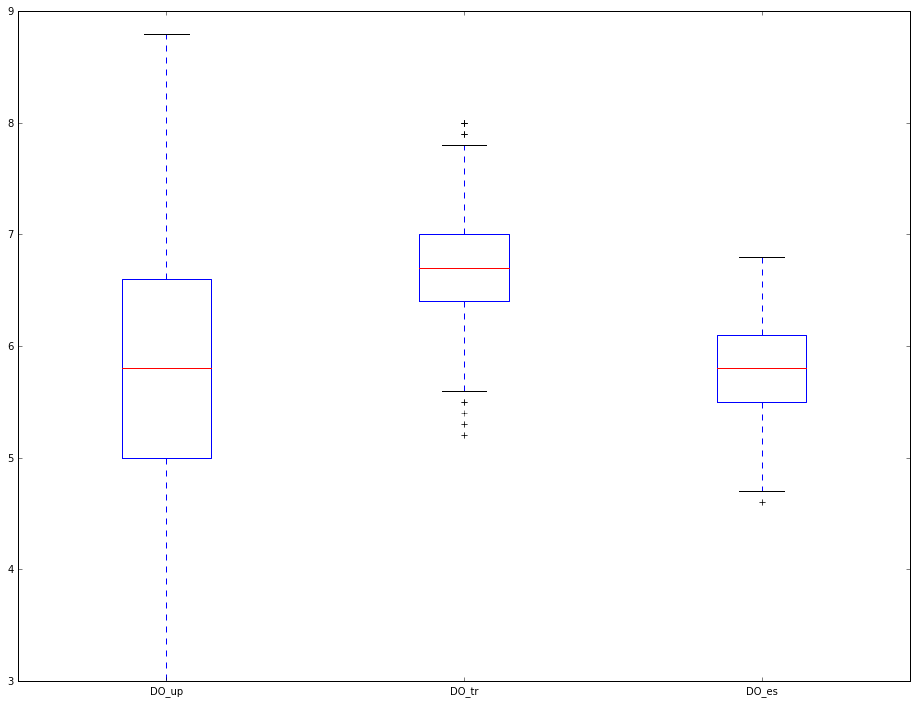

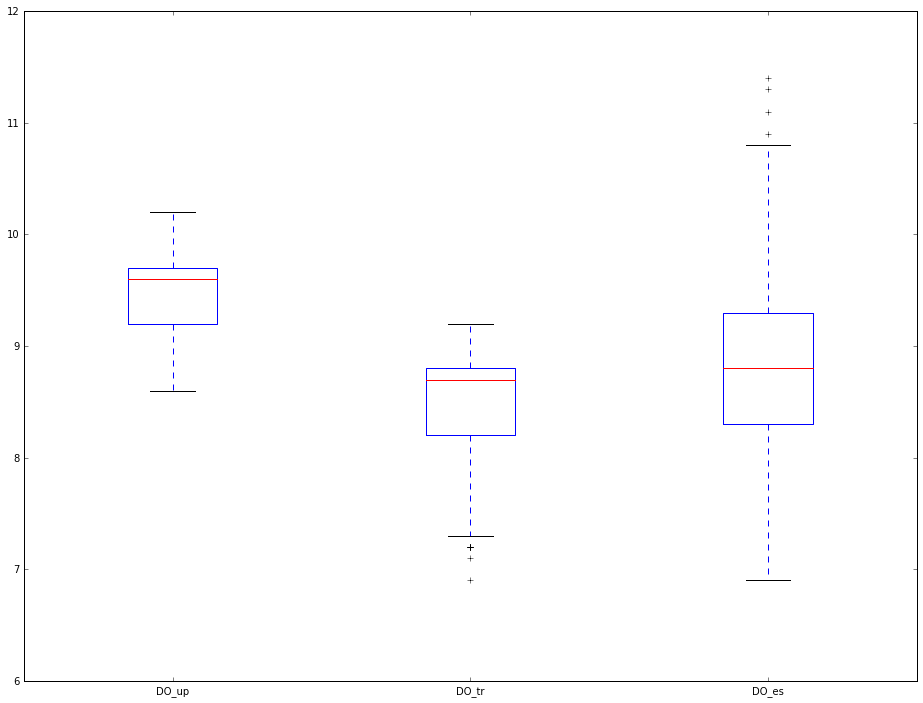

In [29]:
dfjul.plot.box()
dfjan.plot.box()

In [ ]:
## NEXT STEP: compare DO data with temperature, water level